# Introduction
<b> Spotify audio features to determine popularity </b>



## Problem Statement: 
What is the link of spotify’s track characteristics to it’s popularity? <br>
Is it possible to predict the popularity of a song based on spotify’s track characteristics


<b>Dataset: </b>
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

<b>About dataset: </b>
- Dataset contains more than 160.000 songs collected from Spotify Web API. The features include song, artist, release date as well as some characteristics of song such as acousticness, danceability, loudness, tempo and so on. Date range is from 1921 to 2020.
- Target (popularity) of the track: value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Popularity value may lag actual popularity by a few days: the value is not updated in real time.
Reference: https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/




## Data Dictionary:

| KEY | VALUE TYPE |VALUE DESCRIPTION | 
|-----|------------|-------------------|
|acousticness|float|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. <BR> 1.0 represents high confidence the track is acoustic.|
|artists|string|Artist of the track|
|danceability|float|How suitable a track is for dancing based on a combination of musical elements including <BR>  tempo, rhythm stability, beat strength, and overall regularity. <BR> A value of 0.0 is least danceable and 1.0 is most danceable.|
| duration_ms | int | The duration of the track in milliseconds. |
| energy | float |Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. <BR> E.g. a Bach prelude scores low on the scale.| 
| explicit| int | 0 = No explicit content, 1 = Explicit content | 
|id|string|Id of track generated by Spotify|
|instrumentalness| float |The closer the instrumentalness value is to 1.0,  <BR> the greater likelihood the track contains no vocal content.  <BR> Values above 0.5 are intended to represent instrumental tracks <BR> Ranges from 0 to 1. |
| key | int | The estimated overall key of the track. <BR> E.g. 0 = C, 1 = C♯/D♭. If no key was detected, the value is -1. |
|liveness|float|Higher liveness values represent an increased probability that the <BR> track was performed live. A value above 0.8 provides strong likelihood <BR> that the track is live. Ranges from 0 to 1|
|loudness|float|Overall loudness of a track in decibels (dB) <BR> Values typical range between -60 and 0 db.|
|mode| int |The type of scale from which its melodic content is derived. <BR> Major is represented by 1 and minor is 0.
|name|string|Name of the track|
|popularity|int|Popularity of the track. Ranges from 0 to 100|
|release_date|string|Date of release mostly in yyyy-mm-dd format|
|speechiness|float|Detects the presence of spoken words in a track. The more exclusively speech-like the recording <BR> E.g. talk show, the closer to 1.0 the attribute value.  <BR> Ranges from 0 to 1|
|tempo|float|The overall estimated tempo of a track in beats per minute (BPM).Ranging from 50 to 150|
|valence|float|Describing the musical positiveness conveyed by a track. A measure from 0.0 to 1.0 |
|year|int|The year that the track was released in. Ranges from 1921 to 2020|


## Loading Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV


## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

%matplotlib inline

## Loading Dataset

In [2]:
# Read Spotify Dataset
spotify_csv = 'data.csv'
raw_data = pd.read_csv(spotify_csv, index_col='id')

## Explore Dataset

### Head

In [3]:
raw_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
id,,,,,,,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
6KuQTIu1KoTTkLXKrwlLPV,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
6L63VW0PibdM1HDSBoqnoM,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
6M94FkXd15sOAOQYRnWPN8,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
6N6tiFZ9vLTSOIxkj8qKrd,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


### Check Info

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169909 entries, 6KbQ3uYMLKb5jDxLF7wYDD to 60RFlt48hm0l4Fu0JoccOl
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   instrumentalness  169909 non-null  float64
 7   key               169909 non-null  int64  
 8   liveness          169909 non-null  float64
 9   loudness          169909 non-null  float64
 10  mode              169909 non-null  int64  
 11  name              169909 non-null  object 
 12  popularity        169909 non-null  int64  
 13  release_date      169909 non-null  object 
 14  speechiness       169909 non-null  float64
 15  tempo             169909 non-null  f

In [5]:
no_attributes = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 
       'speechiness', 'tempo', 'valence', 'year']
raw_data[no_attributes].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
popularity,169909.0,31.556610,21.582614,0.0,12.0000,33.000000,48.0000,100.000
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
key,169909.0,5.200519,3.515257,0.0,2.0000,5.000000,8.0000,11.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
speechiness,169909.0,0.094058,0.149937,0.0,0.0349,0.045000,0.0754,0.969


### Check Null Values

Check whether dataset have any null values.

In [6]:
# Dataset do not have null values. 
raw_data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

### Cleaning Dataset

In [7]:
# Artist name
# Removing '' and [] from artists to make the data more readable

raw_data['artists'] = raw_data['artists'].str.replace("[","")
raw_data['artists'] = raw_data['artists'].str.replace("]","")
raw_data['artists'] = raw_data['artists'].str.replace("'","")


In [8]:
# Artist name
# Removing '' and [] from artists to make the data more readable

raw_data['name'] = raw_data['name'].str.replace("[","")
raw_data['name'] = raw_data['name'].str.replace("]","")
raw_data['name'] = raw_data['name'].str.replace("'","")
raw_data['name'] = raw_data['name'].str.replace('"',"")
raw_data['name'] = raw_data['name'].str.replace("(","")
raw_data['name'] = raw_data['name'].str.replace(")","")

In [9]:
# Release Date
# Dropping release date, since year is a better column to use for analysing data.
raw_data.drop('release_date', axis=1, inplace=True)

In [10]:
# Duplicate name and artist 
#Noticed that there are duplicated data in the dataset with same artists and title

#Find duplicate rows with same name and artist
duplicateRowsDF = raw_data[raw_data.duplicated(subset=['name','artists'], keep=False)]

#group dup rows by name then artists
dup_rows = duplicateRowsDF[['name', 'artists']].groupby(['name', 'artists'])

#Count the number of duplicated rows
dup_rows_df= pd.DataFrame(dup_rows.size().reset_index(name = "Count"))

#count unique value in duplicated rows
count_dup_rows = dup_rows_df['name'].nunique()


# print count of duplicated rows
print('Count of duplicated rows:',len(duplicateRowsDF),'unique values')

# print unique value in duplicated rows
print('Count of unique name and artists:',count_dup_rows,'unique values')

# Show first 10 rows of duplicated rows
dup_rows_df.head(10)


Count of duplicated rows: 24715 unique values
Count of unique name and artists: 10851 unique values


,name,artists,Count
0,$outh $ide $uicide,"$uicideBoy$, Pouya",2
1,&burn with Vince Staples,"Billie Eilish, Vince Staples",2
2,...And Justice for All Remastered,Metallica,2
3,...Baby One More Time,Britney Spears,2
4,007 Shanty Town,"Desmond Dekker, The Aces",2
5,1 Thing,Amerie,2
6,"10 Préludes, Op. 23: No. 5 in G Minor. Alla ma...","Sergei Rachmaninoff, Ruth Laredo",2
7,100 Miles And Runnin,N.W.A.,2
8,100 Years,Five For Fighting,3
9,100%,Sonic Youth,2


In [11]:
# Closer look on the duplicated rows with same name and artist. Eg. 100 Years by Five For Fighting
# check example
duplicateRowsDF[duplicateRowsDF.name.isin(['100 Years','1 Thing'])].sort_values('artists')

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
id,,,,,,,,,,,,,,,,,
1mnqraQ8oV8MX92rdOFLWW,0.107,Amerie,0.612,238760,0.961,0,0.000042,10,0.0413,-3.078,0,1 Thing,60,0.3330,129.873,0.867,2005
6ZyNjT2hYvfV5PuW84dp1E,0.115,Amerie,0.636,238747,0.946,0,0.000037,10,0.0416,-4.683,0,1 Thing,55,0.3320,125.085,0.891,2008
2lFlveK1y13WWp3vnQtrr3,0.544,Five For Fighting,0.643,244600,0.569,0,0.000022,7,0.1780,-7.459,1,100 Years,65,0.0276,120.507,0.275,2003
0B5KeB25moPkcQUnbDvj3t,0.544,Five For Fighting,0.643,244600,0.569,0,0.000022,7,0.1780,-7.459,1,100 Years,57,0.0276,120.507,0.275,2004
5gBQ3x6u7DCvMW1QoP3CpG,0.565,Five For Fighting,0.636,244173,0.559,0,0.000009,7,0.0971,-7.454,1,100 Years,40,0.0274,120.487,0.288,1997


- Same song by the same artists could be released in different years as they may have been a remastered track. Eg. For the case of track name '1 Thing' by Amelie.  As musical attributes and popularity are different it can be seen as a new track.

- Or it could be an identical song, based on identical musical attributes added on to either a compilation album or a later album such as '100 Years' by Five For Fighting. Which would need to be removed, would choose to keep the earliest version.

Removing tracks with identical musical attributes through 'name','artists','duration_ms','liveness' as both duration and liveness are good indicators for different version of songs (either recorded differently or a remix).

In [12]:
# Count of dup rows considering 'name','artists','duration_ms','liveness'
new_duplicateRowsDF= raw_data[raw_data.duplicated(subset=['name','artists','duration_ms','liveness'])]
print('Count of duplicated rows:', len(new_duplicateRowsDF))

#Dropping above duplicated rows from data, keeping only the first instance
len_data = len(raw_data)
data = raw_data
data.drop_duplicates(subset=['name','artists','duration_ms','liveness'], keep='first', inplace=True)
print('Duplicated rows dropped: ', len_data-len(data), ' entries.')

Count of duplicated rows: 3864
Duplicated rows dropped:  3864  entries.


In [13]:
# Converting duration from millisecond to minutes to make it easily understandable
data['duration_min'] = round((data['duration_ms']/60000),2)

#drop column duration_ms
data.drop('duration_ms', axis=1, inplace=True)

data.duration_min.describe()



count    166045.000000
mean          3.856636
std           2.025095
min           0.090000
25%           2.850000
50%           3.470000
75%           4.380000
max          90.060000
Name: duration_min, dtype: float64

# EDA

__Categorical Data:__
- Artists
- Name
- Explicit
- Key
- Mode


__Numerical Data:__
- Acousticness
- Danceability
- Duration_ms
- Energy
- Instrumentalness
- Liveness
- Loudness
- Popularity
- Speechiness
- Tempo
- Valence
- Year

### Analysis on Numerical Data

__Description of dataset__
Better understanding on the numeric data

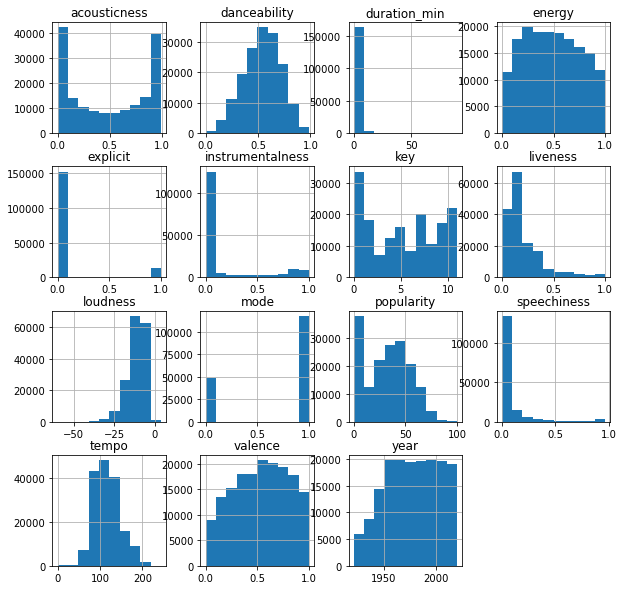

In [14]:
#Visualization of data
data.hist(figsize=(10, 10))
plt.show()

__Observation:__
- Danceability: follows a somewhat normal distribution for the dataset.
- Popularity (Target): Most dataset have 0 for popularity. Would have to look further into it.


#### Correlation of dataset

<Figure size 1152x576 with 0 Axes>

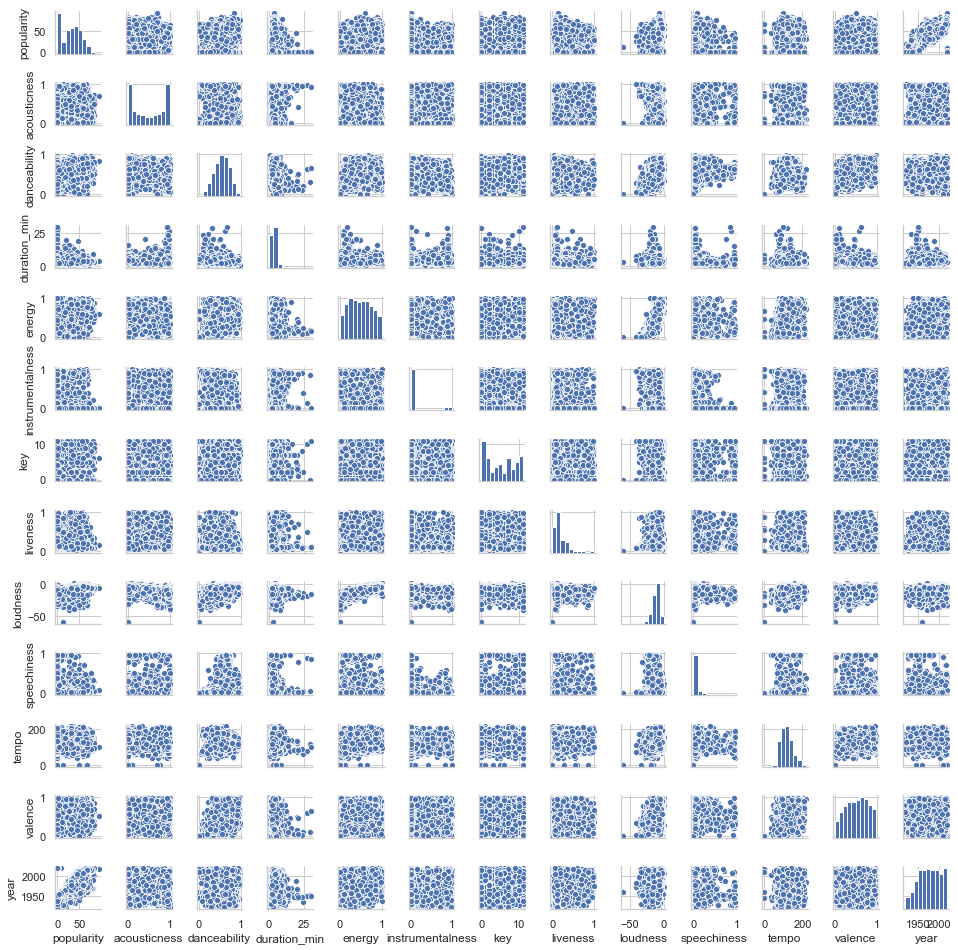

In [15]:
#Pairplot of numerical features of 5000 samples as data is too big
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
no_attributes = ['popularity', 'acousticness', 'danceability', 'duration_min', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 
       'speechiness', 'tempo', 'valence', 'year']
sns.pairplot(data[no_attributes].sample(5000), height = 1)
plt.show();

#### Heatmap of numerical features

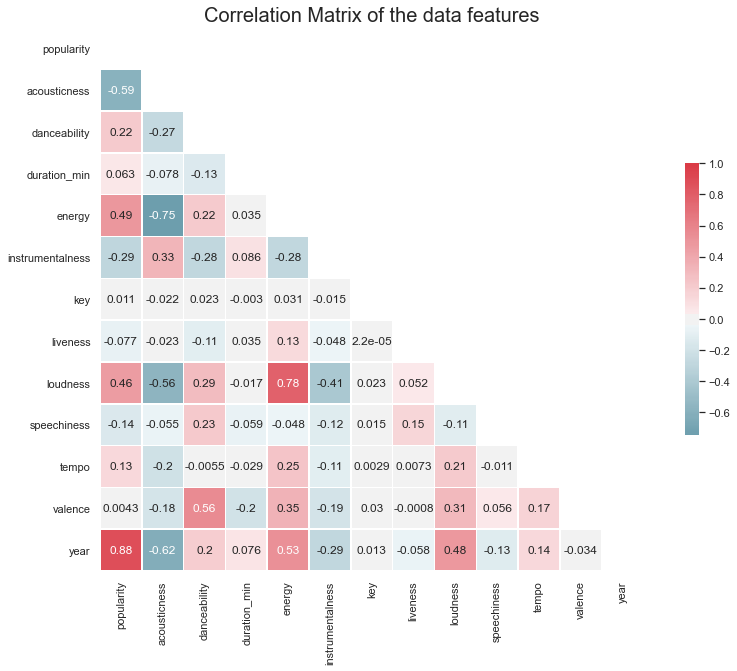

In [16]:
    # Copied code from seaborn examples
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    sns.set(style="white")
    corr= data[no_attributes].corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    
    plt.title('Correlation Matrix of the data features', fontsize = 20)

    plt.show()

__Observations__

Attributes with high correlations to popularity are:
- Year (0.88)
- Energy (0.49)
- Loudness (0.46)
- Acousticness (-0.59)


Other highly correlated features:
- Energy and acousticness (-0.75)
- Loudness and energy (0.78)
- Valence and danceability (0.56)
- Energy and Year (0.53)
- Loudness and Year (0.48)


#### Functions

In [17]:
#plot chart by mean to year
def plot_feature_by_mean(feature):
    plt.figure(figsize=(16, 8))
    sns.set(style="whitegrid")
    columns = [feature]
    for col in columns:
        x = data.groupby("year")[col].mean()
        ax= sns.lineplot(x=x.index,y=x,label=col)
    ax.set_title("{} over the years".format(feature))
    ax.set_ylabel("{} average".format(feature))
    ax.set_xlabel('Year')
    plt.show()

#plot chart by count to year    
def plot_feature_by_count(feature):
    plt.figure(figsize=(16, 8))
    sns.set(style="whitegrid")
    x = data.groupby("year")[feature].count()
    ax= sns.lineplot(x=x.index,y=x)
    ax.set_title("{} over the years".format(feature))
    ax.set_ylabel('Count')
    ax.set_xlabel('Year')
    plt.show()

#function to chart top features to popularity by sum
def cat_chart_sum (feature, top_no):
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    df = data.groupby(feature)["popularity"].sum().sort_values(ascending=False).head(top_no)
    ax = sns.barplot(x=df.values,y=df.index)
    ax.set_title('Top 10 '+feature+' by Popularity')
    ax.set_ylabel(feature)
    ax.set_xlabel('Sum of Popularity')
    plt.show()

#function to chart top features to popularity with mean
def cat_chart_mean (feature, top_no):
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    df = data.groupby(feature)["popularity"].mean().sort_values(ascending=False).head(top_no)
    ax = sns.barplot(x=df.values,y=df.index)
    ax.set_title('Top 10 '+feature+' by Popularity')
    ax.set_ylabel(feature)
    ax.set_xlabel('Popularity')
    plt.show()    
    
#plot chart for features co-efficient    
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    ax = sns.barplot(x="variable", y="coef", data=model_coefs)
    plt.xticks(rotation = 90)
    
    
def cal_mean_r2_and_RMSE (model,cv,X,y):
    train_scores = []
    train_rmse = []
    test_scores = []
    test_rmse = []
    k_fold = KFold(cv, shuffle=True)
    
    for k, (train, test) in enumerate(k_fold.split(X)):
        # Get training and test sets for X and y
        X_train = X.iloc[train, ]
        y_train = y.iloc[train, ]
        X_test = X.iloc[test, ]
        y_test = y.iloc[test, ]
        
        # Fit model with training set
        model.fit(X_train, y_train)
        
        # Make predictions with training and test set
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        
        # Score R2 and RMSE on training and test sets and store in list
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))
        
        train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
        test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))
    #Create a metrics_df dataframe to display r2 and rmse scores
    metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse})
                                  
    return metrics_df
    
    
    
    

#### Acousticness
    - A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
    - 1.0 represents high confidence the track is acoustic.


__Observation:__ <br>
Accousticness is highly negatively correlated to popularity and Energy:
- From both the plot below, it can be seen that the more accoustic a track is, it tends to be less popular.
- It also reflects that acoustic tracks tends to have lower energy as most accoustic tracks are produced by acoustic guitars and tambourines hence why tracks with tracks with 0 acoustic would have higher popularity which would represent music produced electronically.
- High negative correlation with popularity, -0.59

Ref: 
https://www.theguardian.com/technology/2013/nov/25/pop-music-louder-less-acoustic

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5495864/

<Figure size 1440x1080 with 0 Axes>

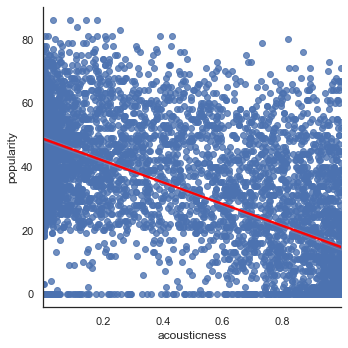

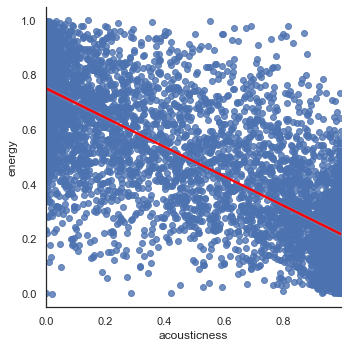

In [18]:
#Plot Acousticness against energy and popularity with 5000 sample
plt.figure(figsize=(20,15))
sns.lmplot(x='acousticness', y='popularity', data=data.sample(5000),line_kws={'color': 'red'})
sns.lmplot(x='acousticness', y='energy', data=data.sample(5000),line_kws={'color': 'red'})


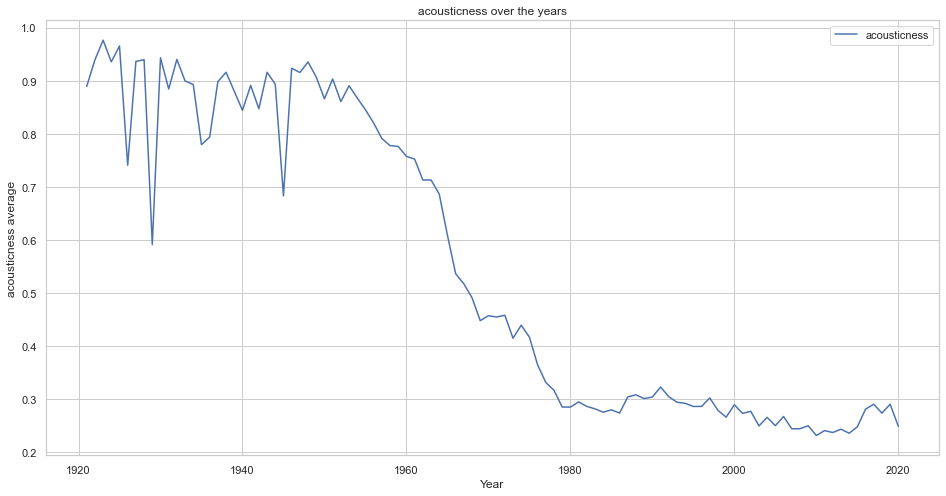

In [19]:
plot_feature_by_mean("acousticness")

Number of accoustic tracks have dropped significantly over the years from around 1950s.<br>
Most likely due to the change in musical preferences over the years.

According to a blog post by Echo Nest, a music intelligence and data platform owned by Spotify since 2014, 
"Popular music started out fairly acoustic in the ’50s. After that, its “acousticness” declined steadily, decade after decade, mirroring technology’s integration into greater society at large," 
Reference: https://blog.echonest.com/post/62809944962/acoustic-instruments-a-tale-of-two-millennia


#### Danceability
    - How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
    - A value of 0.0 is least danceable and 1.0 is most danceable


__Observation:__
- Correlation with popularity, 0.22
- The dataset for this feature follows a somewhat normal distribution.
- It has high correlation with Valence (0.56) which can be explained that tracks with high dancability are mostly songs that are highly associated with happiness and positivity.



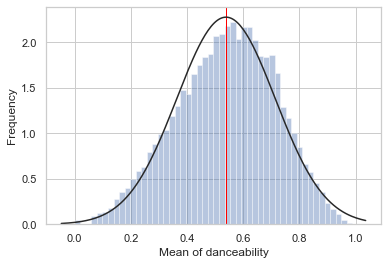

In [20]:
#plot distribution of danceability
x=data.danceability.mean()
plt.axvline(x,color='red', linestyle='solid',lw=1)
sns.distplot(data["danceability"], fit=norm, kde=False)
plt.xlabel('Mean of danceability')
plt.ylabel('Frequency')
plt.show()

<Figure size 1440x1080 with 0 Axes>

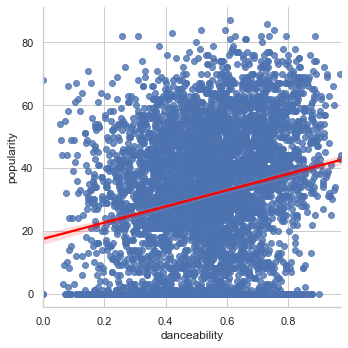

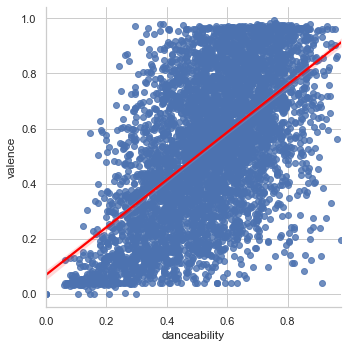

In [21]:
#Plot Acousticness against energy and popularity with 5000 sample
plt.figure(figsize=(20,15))
sns.lmplot(x="danceability", y='popularity', data=data.sample(5000),line_kws={'color': 'red'})
sns.lmplot(x="danceability", y='valence', data=data.sample(5000),line_kws={'color': 'red'})


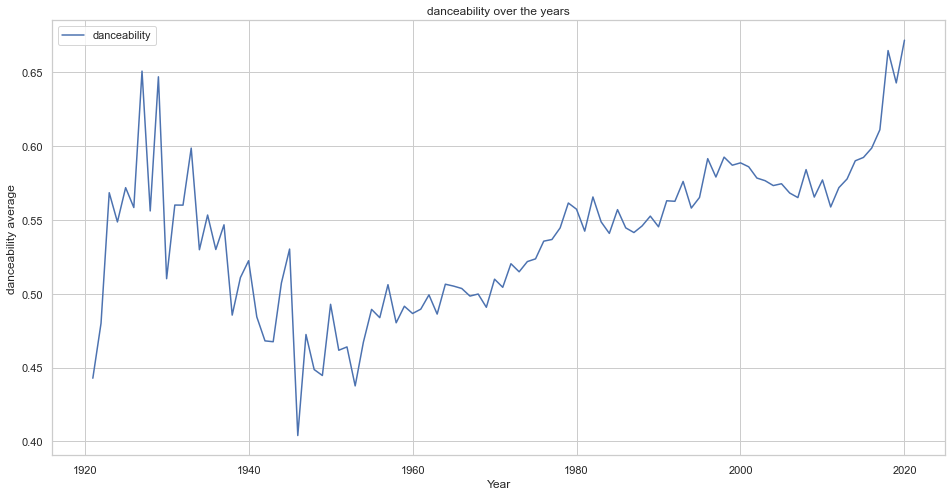

In [22]:
plot_feature_by_mean("danceability")

Danceability in tracks started to reduce after 1930s but started to increase in late 1940s and it has been increasing since with a steep increase in 2010

#### Duration_min
    - The duration of the track in milliseconds


__Observation:__
- Low correlation with popularity, 0.063 to explain any relationship

<Figure size 1152x576 with 0 Axes>

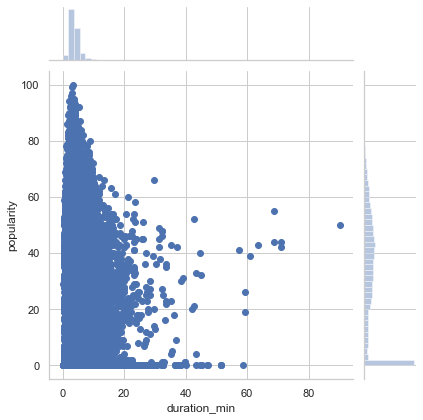

In [23]:
#jointplot
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x="duration_min",y="popularity",data=data)

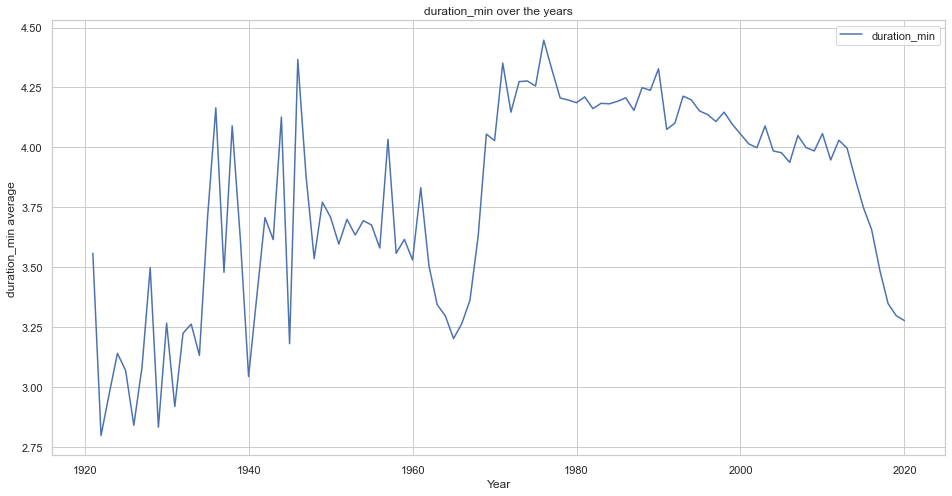

In [24]:
plot_feature_by_mean('duration_min')

Late 1970s - 2010: Average duration of tracks per year are within 4-4.25mins <br>
Late 2010s - 2020: Average duration of tracks per year have been reduced to about 3.25 - 3.3mins mark


#### Energy

    - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
    - Typically, energetic tracks feel fast, loud, and noisy. 
    - For example, death metal has high energy, while a Bach prelude scores low on the scale. 
    - Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
    
__Observation:__ <br>
Energy is highly negatively correlated to Acousticness and positively correlated to Year and Popularity:
- Energy and acousticness (-0.75)
- Energy and Year (0.53)
- Energy and Popularity (0.49)

<Figure size 1440x1080 with 0 Axes>

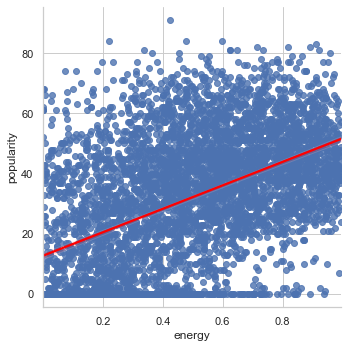

In [25]:
plt.figure(figsize=(20,15))
sns.lmplot(x="energy", y='popularity', data=data.sample(5000),line_kws={'color': 'red'})

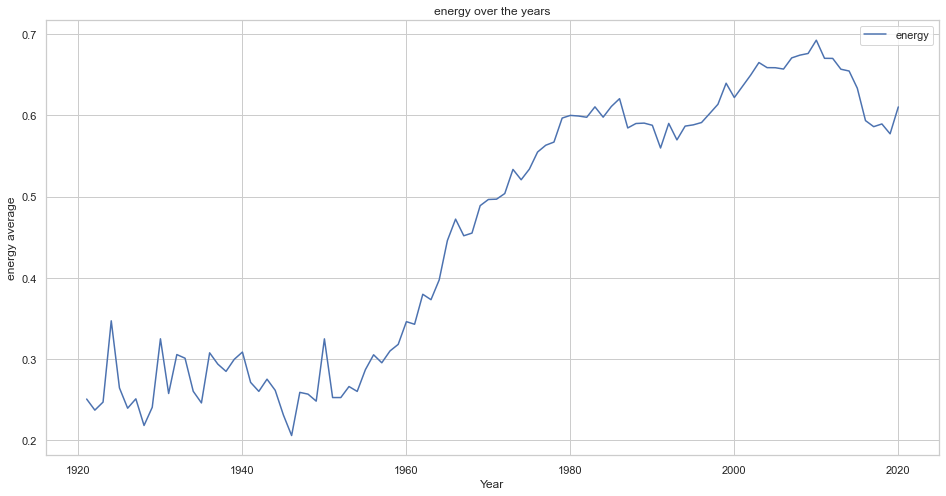

In [26]:
plot_feature_by_mean('energy')

1950 onwards, there was a trend of music getting more energetic and it slightly plateaued during the 80's.<br>
In general, energy level of music has been rising steadily over the past decades, most likely due to an overall increase in the speed of our lives.

Reference: https://blog.echonest.com/post/60842073276/is-music-getting-more-energetic-over-time

#### Instrumentalness

- The closer the instrumentalness value is to 1, the greater likelihood the track contains no vocal content.
- Values above 0.5 are intended to represent instrumental tracks
- Ranges from 0 to 1.

__Observation:__ <br>
Negative correlation to:
- Popularity, -0.29
- Loudness, -0.41

<Figure size 1440x1080 with 0 Axes>

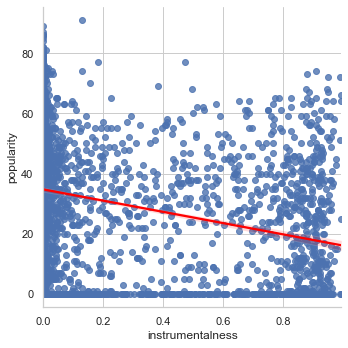

In [27]:
plt.figure(figsize=(20,15))
sns.lmplot(x="instrumentalness", y='popularity', data=data.sample(5000),line_kws={'color': 'red'})

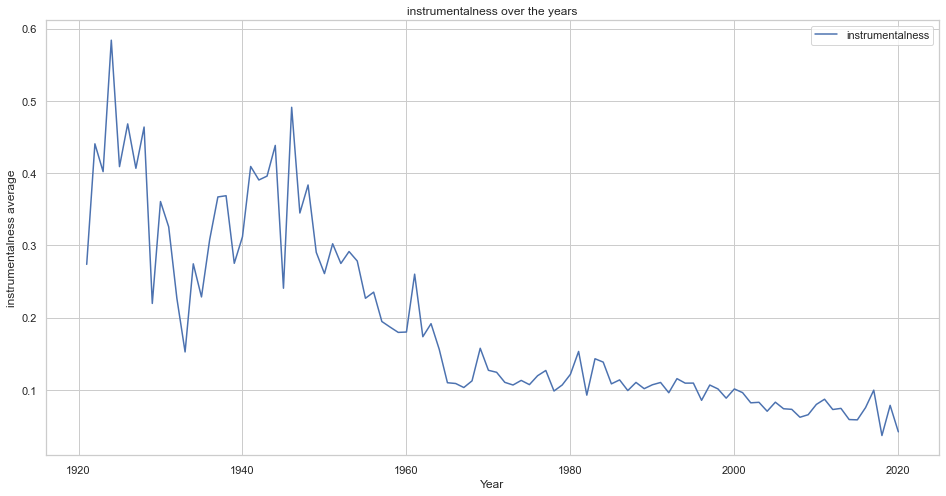

In [28]:
plot_feature_by_mean('instrumentalness')

#### Liveness

- The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- Values above 0.5 are intended to represent instrumental tracks
- Ranges from 0 to 1.

__Observation:__ <br>
- Low in negative correlation with popularity, -0.077


<Figure size 1440x1080 with 0 Axes>

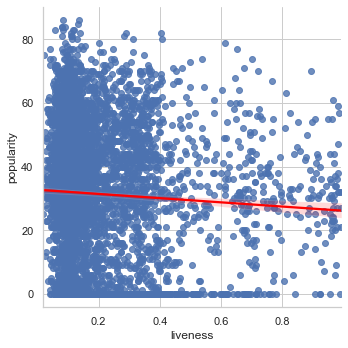

In [29]:
plt.figure(figsize=(20,15))
sns.lmplot(x="liveness", y='popularity', data=data.sample(5000),line_kws={'color': 'red'})

#### Loudness


- Overall loudness of a track in decibels (dB)
- Values typical range between -60 and 0 db.

__Observation:__ <br>
High correlation with:
- Energy, 0.78
- Acousticness, -0.56
- Year, 0.48
- Popularity, 0.46

<Figure size 1440x1080 with 0 Axes>

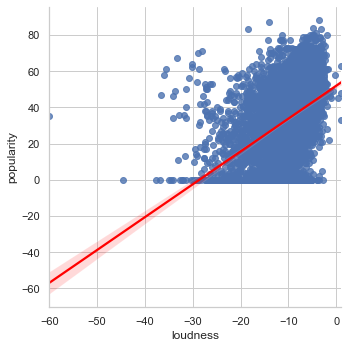

In [30]:
plt.figure(figsize=(20,15))
sns.lmplot(x="loudness", y='popularity', data=data.sample(5000),line_kws={'color': 'red'})

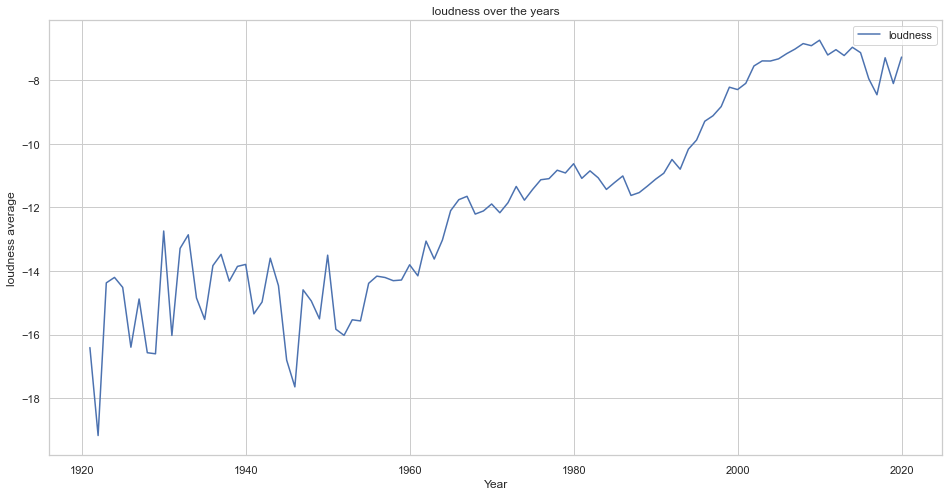

In [31]:
plot_feature_by_mean('loudness')

Steady increase of loudness in tracks from 1950 to 2010 and seems to be stabilizing to 2020.
The increase of loudness in tracks can be explained by a phenomenon called the "Loudness war"


The loudness war (or loudness race) refers to the trend of increasing audio levels in recorded music, which reduces audio fidelity, and according to many critics, listener enjoyment.
The loudness war ideology is ‘the louder your track, the better it will sound to your listeners’.

Reference: https://blog.echonest.com/post/62248127937/the-loudness-war-is-real-and-we-can-prove-it-with

#### Speechiness

- Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show), the closer to 1 the attribute value.
- Ranges from 0 to 1
    - Values above 0.66 describe tracks that are probably made entirely of spoken words. 
    - Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. 
    - Values below 0.33 most likely represent music and other non-speech-like tracks. 

__Observation:__ <br>
- Negative correlation to poularity, -0.14


<Figure size 1440x1080 with 0 Axes>

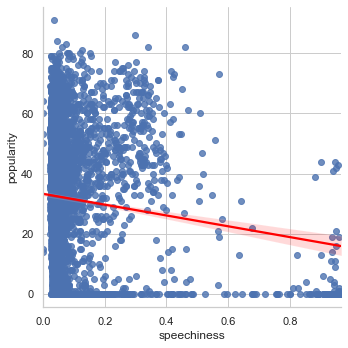

In [32]:
plt.figure(figsize=(20,15))
sns.lmplot(x="speechiness", y='popularity', data=data.sample(5000),line_kws={'color': 'red'})

#### Tempo

- The overall estimated tempo of a track in beats per minute (BPM).
- Ranging from 50 to 150
- One of the metric used for danceability

__Observation:__
- Correlation to popularity, 0.13
- tempo has remained fairly constant over the past few decades
- "There was, however, a time when the speed of our favorite music was accelerating. Starting in the ‘50s, the advent of rock n’ roll may have combined with our growing obsession with the automobile and/or other factors to propel the tempo of our favorite music to new heights, leading to highpoints in 1980 and 1983." According to blogpost by Echo Nest.
Reference: https://blog.echonest.com/post/61686021710/people-liked-their-music-fastest-in-the-80s


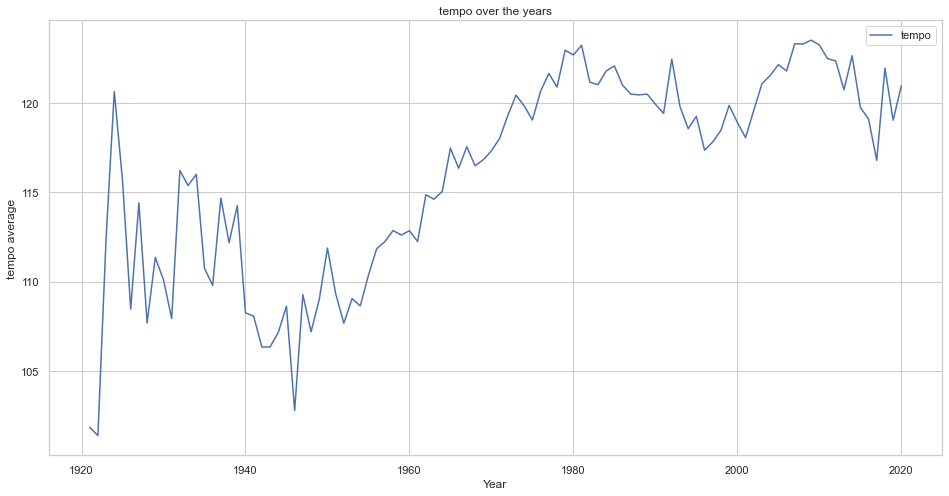

In [33]:
plot_feature_by_mean('tempo')

#### Valence

- A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
- High valence sound more positive (e.g. happy, cheerful, euphoric)
- Low valence sound more negative (e.g. sad, depressed, angry)

__Observation:__ <br>
- Low correlation to popularity, 0.0043
- High correlation to danceability, 0.56
- Apparently, regardless of decade, prominent musical styles, or any other factor, we pretty much always like our pop music, on average, right in the middle of happy and sad, explains The Echo Nest's blog post.
Reference: https://blog.echonest.com/post/66097438564/plotting-musics-emotional-valence-1950-2013

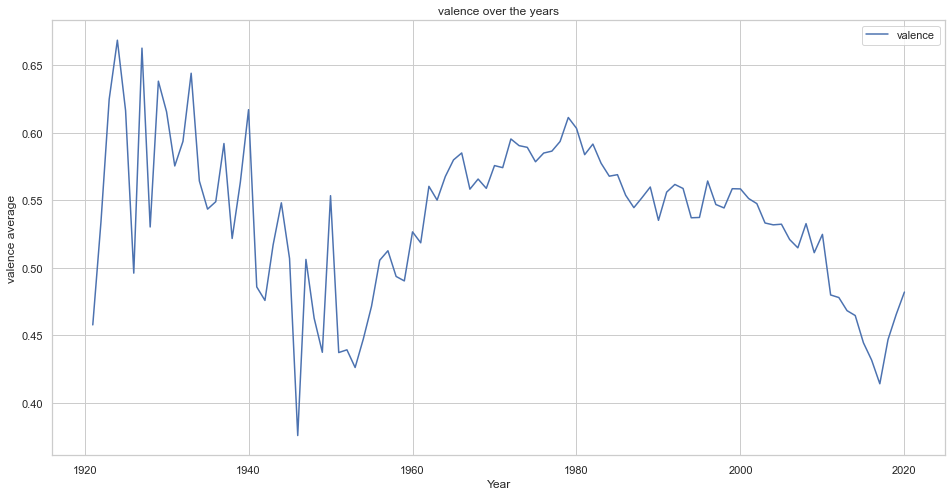

In [34]:
plot_feature_by_mean('valence')

#### Year

- The year that the track was released in. 
- Ranges from 1921 to 2020

__Observation:__ <br>
- Outlier in year 2020 as they are most likely new songs just released in 2020 without any popularity ratings yet
- High correlation with :
    - Popularity, 0.88 (highest)
    - Acousticness, -0.62
    - Energy, 0.53
    - Loudness, 0.48




<Figure size 2880x2880 with 0 Axes>

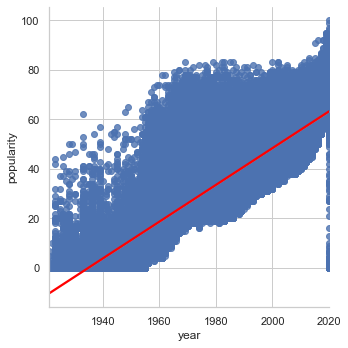

In [35]:
plt.figure(figsize=(40,40))
sns.lmplot(x="year", y='popularity', data=data,line_kws={'color': 'red'})

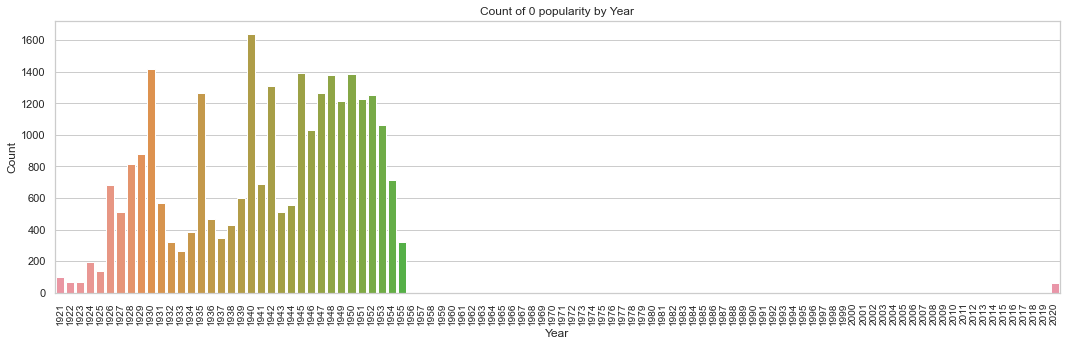

In [36]:
#Finding outlier in 2020
df=data.groupby('year')['popularity'].apply(lambda x: (x==0).sum()).reset_index(name='count')

plt.figure(figsize=(18,5))
ax = sns.barplot(x=df['year'],y=df['count'])
ax.set_title("Count of 0 popularity by Year")
ax.set_ylabel("Count")
ax.set_xlabel('Year')
plt.xticks(fontsize=10, rotation = 90)
plt.show()

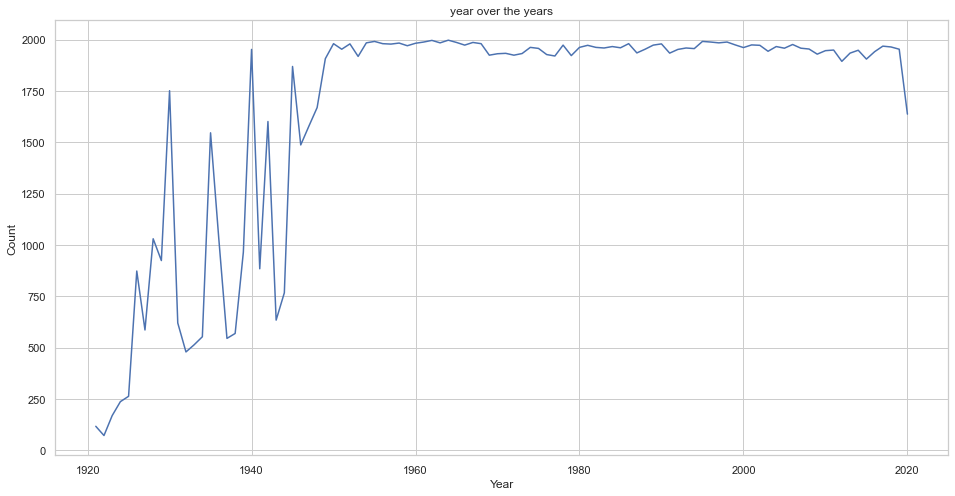

In [37]:
#plot no of songs per year in dataset
plot_feature_by_count('year')

#### Audio features timeseries Analysis

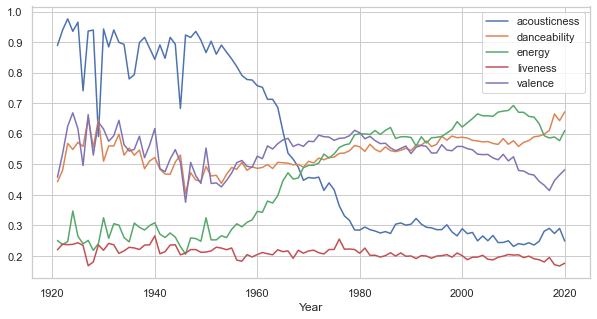

In [38]:

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel('Year')
plt.show()

### Analysis on categorical Data


#### Artist


In [39]:
# Description of Artist
# There are artists with mutliple tracks in the list
data.artists.describe()

count               166045
unique               33374
top       Эрнест Хемингуэй
freq                  1215
Name: artists, dtype: object

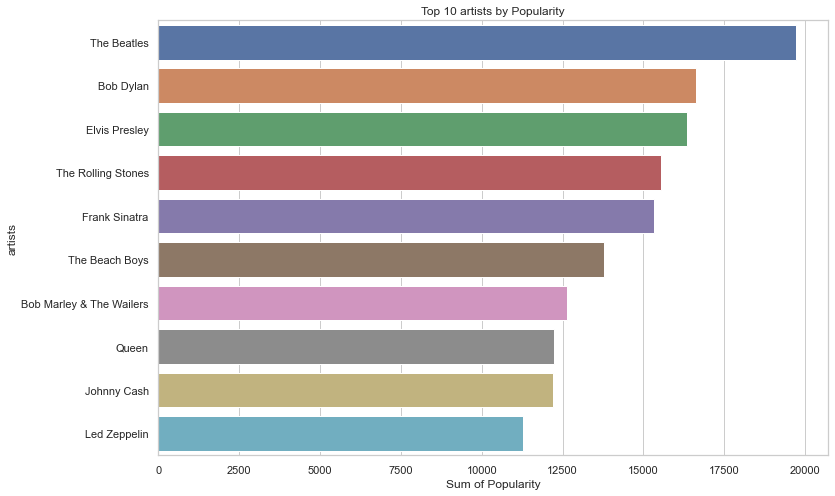

None


In [40]:
# Top 10 artist by tracks with most popularity
top_10_artist = cat_chart_sum("artists",10)
print(top_10_artist)

#### Track Names

__Observation:__
- Top 10 most popular songs are mostly from recent years, 2019 to 2020.
- Generally low in acousticness, mean: 0.21, standard deviation: 0.28

In [41]:
# Description of Track names
# There are mutliple tracks with the same name in the list
data.name.describe()

count         166045
unique        132731
top       Summertime
freq              60
Name: name, dtype: object

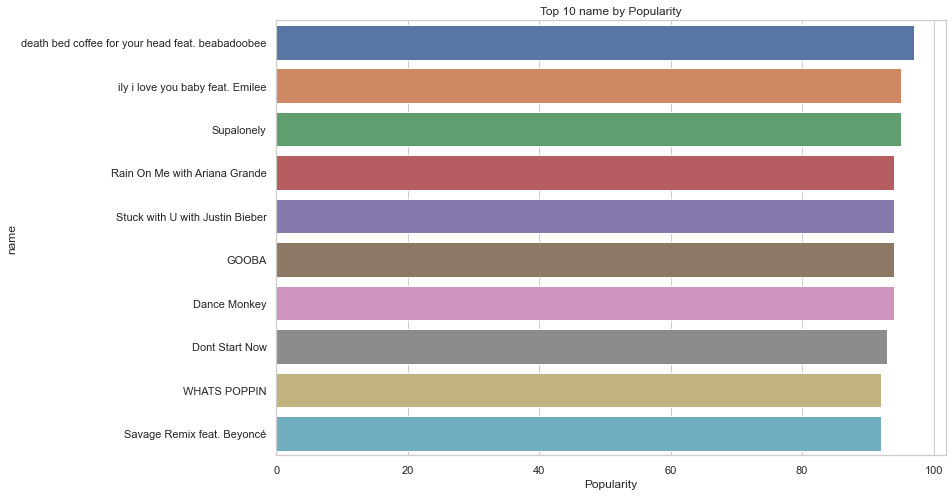

In [42]:
#Top 10 tracks by popularity
cat_chart_mean("name",10)

In [43]:
top_10_tracks_features = data[['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 
       'speechiness', 'tempo', 'valence', 'year','name']].groupby('name').mean().sort_values(by='popularity',ascending=False).reset_index()
top_10_tracks_features.head(10).describe()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,94.000000,0.211750,0.754400,0.657200,0.000208,8.300000,0.30282,-5.988300,0.119120,132.938000,0.554000,2019.600000
std,1.490712,0.281727,0.114106,0.143264,0.000589,3.164034,0.17443,1.522109,0.098446,29.025646,0.181797,0.516398
min,92.000000,0.012500,0.597000,0.431000,0.000000,1.000000,0.09520,-8.765000,0.039700,97.014000,0.330000,2019.000000
25%,93.250000,0.021000,0.672500,0.592000,0.000000,7.250000,0.17450,-6.667750,0.057425,114.801500,0.408000,2019.000000
50%,94.000000,0.047500,0.760000,0.659500,0.000000,8.500000,0.29750,-6.044000,0.086700,126.459000,0.525000,2020.000000
75%,94.750000,0.284500,0.851000,0.770000,0.000057,11.000000,0.37250,-4.806750,0.124350,144.803000,0.669250,2020.000000
max,97.000000,0.731000,0.923000,0.855000,0.001880,11.000000,0.69600,-3.764000,0.341000,178.765000,0.826000,2020.000000


#### Explicit
- Whether or not the track has explicit lyrics e.g. strong language or depictions of violence, sex, or substance abuse) 
- 0 = No explicit content 
- 1 = Explicit content

__Observation:__
- More than 80% of the tracks do not contain explicit content
- Correlation to popularity, 0.21



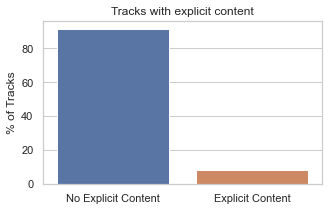

In [44]:
# % Count of tracks with and without explicit content 
plt.figure(figsize=(5,3))
x_ticks = ['No Explicit Content', 'Explicit Content']
ax = sns.barplot(y = (data['explicit'].value_counts(normalize=True)*100),
                 x= x_ticks, 
                 data=data)
ax.set_title("Tracks with explicit content")
ax.set_ylabel("% of Tracks")
plt.show()

In [45]:
df_explicit = data[['explicit', 'popularity']]
df_explicit.corr()

,explicit,popularity
explicit,1.000000,0.211261
popularity,0.211261,1.000000


#### Key

- The estimated overall key of the track. 
- Integers map to pitches using standard Pitch Class notation E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 
- If no key was detected, the value is -1.
- Total of 12 keys

__Observation:__ <br>
- Low correlation to popularity, 0.01

In [46]:
data.key.value_counts(sort=False)

0     21059
1     12519
2     18386
3      7023
4     12612
5     15991
6      8375
7     20267
8     10478
9     17210
10    11777
11    10348
Name: key, dtype: int64

In [47]:
df_key = data[['key', 'popularity']]
df_key.corr()

,key,popularity
key,1.000000,0.011325
popularity,0.011325,1.000000


#### Mode
- Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. 
- Major is represented by 1 
- Minor is 0

Describes the emotional character of a key. 
Law of contrast is the reason there are two tonalities in music: Major key and Minor key
The process of reproducing the major or minor mode will entail the use of what we call “pitch modifiers” 
(sharps, flats etc.)


__Observation:__ <br>
- Low negative correlation to popularity, -0.03

In [48]:
data['mode'].value_counts(sort=False)

0     48321
1    117724
Name: mode, dtype: int64

In [49]:
df_mode = data[['mode', 'popularity']]
df_mode.corr()

,mode,popularity
mode,1.000000,-0.032369
popularity,-0.032369,1.000000


#  Machine Learning

## Model - Linear regression

### Preparing model
Dropping categorical features & features with high degree of multicollinearity: 
- name
- artists
- loudness
- energy
- valence

#### Train Model & Normalisation

In [50]:
from sklearn.preprocessing import MinMaxScaler
# drop cat feature
adj_data = data.drop(['name','artists', 'loudness', 'energy','valence'], axis=1)

target_col = 'popularity'
feature_cols = [c for c in adj_data.columns if c != target_col]
columns = [
    'id','acousticness', 'danceability', 'explicit','instrumentalness',
                'key','liveness','mode','popularity','speechiness','tempo','year','duration_min'
]

index = adj_data.index

adj_data.head()


,acousticness,danceability,explicit,instrumentalness,key,liveness,mode,popularity,speechiness,tempo,year,duration_min
id,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,0.995,0.708,0,0.563,10,0.1510,1,0,0.0506,118.469,1928,2.64
6KuQTIu1KoTTkLXKrwlLPV,0.994,0.379,0,0.901,8,0.0763,1,0,0.0462,83.972,1928,4.70
6L63VW0PibdM1HDSBoqnoM,0.604,0.749,0,0.000,5,0.1190,0,0,0.9290,107.177,1928,1.74
6M94FkXd15sOAOQYRnWPN8,0.995,0.781,0,0.887,1,0.1110,0,0,0.0926,108.003,1928,3.01
6N6tiFZ9vLTSOIxkj8qKrd,0.990,0.210,0,0.908,11,0.0980,1,1,0.0424,62.149,1928,11.46


In [51]:
#Normalisation of X from 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(adj_data)



#move the data back to a dataframe
df = pd.DataFrame.from_records(normalizedData, columns = columns[1:], index = index)
df = df[['acousticness', 'danceability', 'explicit','instrumentalness',
         'key','liveness','mode','speechiness','tempo','year','duration_min','popularity']]
df.head()

,acousticness,danceability,explicit,instrumentalness,key,liveness,mode,speechiness,tempo,year,duration_min,popularity
id,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,0.998996,0.716599,0.0,0.563,0.909091,0.1510,1.0,0.052219,0.485348,0.070707,0.028343,0.00
6KuQTIu1KoTTkLXKrwlLPV,0.997992,0.383603,0.0,0.901,0.727273,0.0763,1.0,0.047678,0.344019,0.070707,0.051239,0.00
6L63VW0PibdM1HDSBoqnoM,0.606426,0.758097,0.0,0.000,0.454545,0.1190,0.0,0.958720,0.439086,0.070707,0.018339,0.00
6M94FkXd15sOAOQYRnWPN8,0.998996,0.790486,0.0,0.887,0.090909,0.1110,0.0,0.095562,0.442470,0.070707,0.032455,0.00
6N6tiFZ9vLTSOIxkj8qKrd,0.993976,0.212551,0.0,0.908,1.000000,0.0980,1.0,0.043756,0.254614,0.070707,0.126375,0.01


In [52]:
X = df[feature_cols]
y = df[target_col]


#split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2)

# #Normalisation of X from 0-1
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_train_scaled = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(X_train_scaled)

# X_test_scaled = scaler.fit_transform(X_test)
# X_test = pd.DataFrame(X_test_scaled)

#Build model
linreg1 = LinearRegression()

#Fit
linreg1.fit(X_train, y_train)

LinearRegression()

In [53]:
kfold = KFold(10, shuffle=True)
results_lr = cross_val_score(linreg1, X_train, y_train, cv= kfold)
print('Linear Regression, Cross-Validation mean: %.4f' % results_lr.mean())

Linear Regression, Cross-Validation mean: 0.7835


In [54]:
import statsmodels.api as sm
model = sm.OLS(y_test, X_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          6.227e+04
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                        0.00
Time:                        02:10:51   Log-Likelihood:                          44192.
No. Observations:               49814   AIC:                                 -8.836e+04
Df Residuals:                   49803   BIC:                                 -8.826e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness        -0.0517      0.001    -39.288      0.000      -0.054      -0.049
danceability         0.0204      0.002      8.457      0.000       0.016       0.025
explicit             0.0073      0.002      3.863      0.000       0.004       0.011
instrumentalness    -0.0302      0.002    -19.199      0.000      -0.033      -0.027
key                 -0.0089      0.001     -6.445      0.000      -0.012      -0.006
liveness            -0.0360      0.003    -14.251      0.000      -0.041      -0.031
mode                -0.0066      0.001     -6.776      0.000      -0.008      -0.005
speechiness         -0.0823      0.003    -24.209      0.000      -0.089      -0.076
tempo               -0.0225      0.003     -7.421      0.000      -0.028      -0.017
year                 0.6604      0.002    319.653      0.000       0.656       0.664
duration_min        -0.1138      0.019     -5.934      0.000      -0.151      -0.076
==============================================================================
Omnibus:                     7669.088   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17654.612
Skew:                           0.896   Prob(JB):                         0.00
Kurtosis:                       5.301   Cond. No.                         60.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

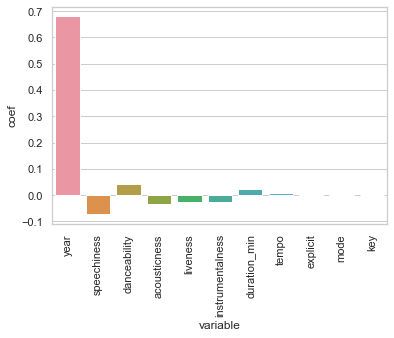

In [55]:
view_coeff(X, linreg1)

#### Cross Validation

In [56]:
# Cross validation 
from sklearn.metrics import mean_squared_error

In [57]:
# Set up 10-fold cross validation  
k_fold = KFold(10, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []
lr=LinearRegression()

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df1 = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(10)])

metrics_df1.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,10.000000,10.000000,10.000000,10.000000
mean,0.784751,0.784709,0.099752,0.099758
std,0.000261,0.002355,0.000065,0.000588
min,0.784357,0.782229,0.099670,0.098868
25%,0.784546,0.782348,0.099701,0.099320
50%,0.784765,0.784579,0.099748,0.099796
75%,0.785012,0.786548,0.099801,0.100224
max,0.785027,0.788266,0.099851,0.100500


#### Forward Feature Selection

In [58]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [59]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature year with R^2 = 0.777 and adjusted R^2 = 0.777
Added feature acousticness with R^2 = 0.780 and adjusted R^2 = 0.780
Added feature speechiness with R^2 = 0.782 and adjusted R^2 = 0.781
Added feature danceability with R^2 = 0.783 and adjusted R^2 = 0.783
Added feature instrumentalness with R^2 = 0.784 and adjusted R^2 = 0.784
Added feature liveness with R^2 = 0.785 and adjusted R^2 = 0.785
Added feature explicit with R^2 = 0.785 and adjusted R^2 = 0.785
Added feature tempo with R^2 = 0.785 and adjusted R^2 = 0.785
Added feature mode with R^2 = 0.785 and adjusted R^2 = 0.785
**************************************************

Resulting features:
year, acousticness, speechiness, danceability, instrumentalness, liveness, explicit, tempo, mode


#### Lasso

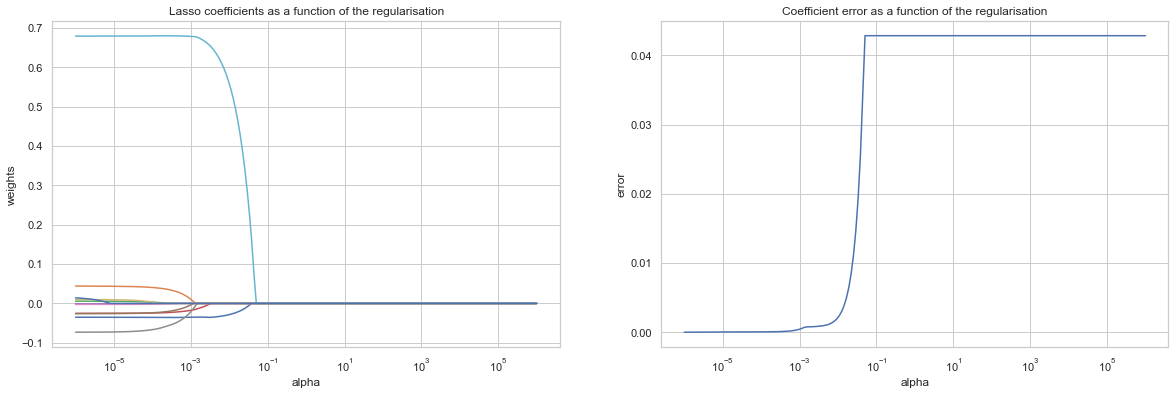

In [60]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
clf = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)



# Train the model with different regularisation strengths
for a in lasso_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, linreg1.coef_))



# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

Alpha: 1.0595601792776149e-05
Score: 0.7847457680270081


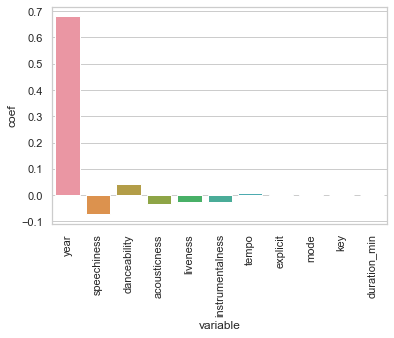

In [61]:
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))
view_coeff(X, optimal_lasso)

#### Ridge

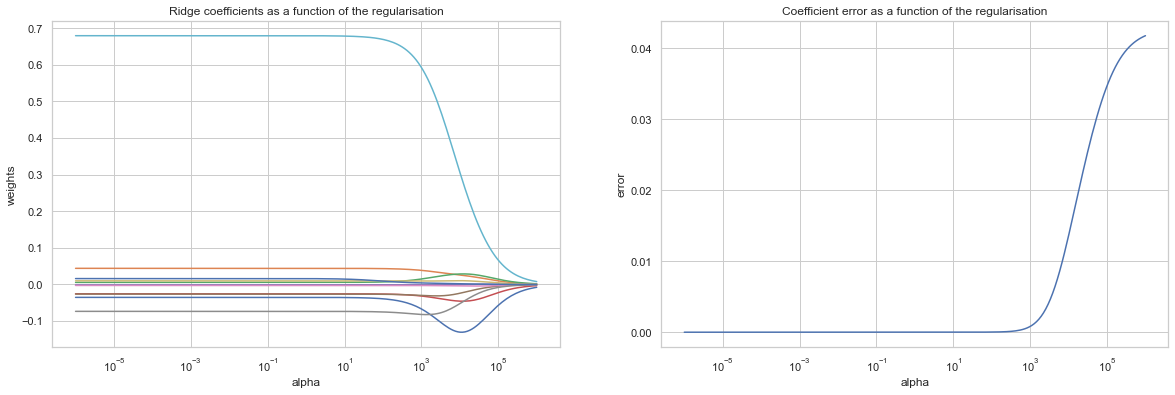

In [62]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, linreg1.coef_))
    
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

Alpha: 158.85651294280527
Score: 0.7845377979236756


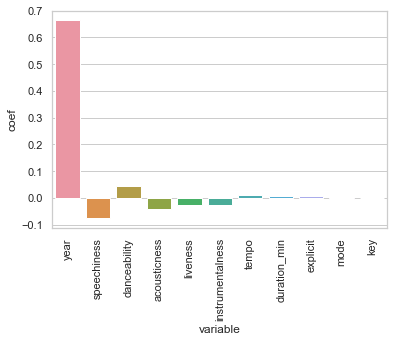

In [63]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))
view_coeff(X, optimal_ridge)

### Forward featuring for prediction

year, instrumentalness, danceability, speechiness, acousticness, liveness, explicit, mode

#### Train model

In [64]:
target_col = 'popularity'
feature_cols = ['year','acousticness', 'speechiness','danceability','instrumentalness','liveness']

X4 = df[feature_cols]
y4 = df[target_col]



#split
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.3, random_state = 2)



#Build model
linreg4 = LinearRegression()

#Fit
linreg4.fit(X_train, y_train)

##Predicting with the model
y_test_pred = linreg4.predict(X_test)


In [65]:
from IPython.display import display, Math

def get_printable_equation(data, inter, coef):
  equation = '$Popularity = ' + f'{inter:.2f} '
  
  for i, co in enumerate(coef):
    if i == len(coef) - 1:
        equation = equation + f'+ {co:.2f} {(data.columns)[i]}$'
    else:
        equation = equation + f'+ {co:.2f} {(data.columns)[i]}'

  return display(Math(equation))

get_printable_equation(X_train, linreg4.intercept_, linreg4.coef_)


<IPython.core.display.Math object>

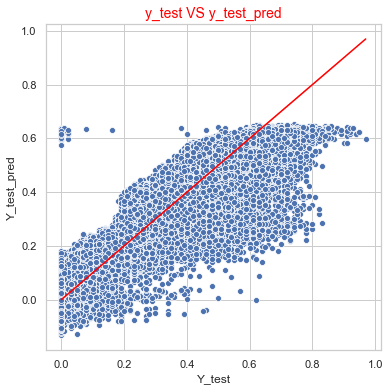

In [66]:
#plotting y_test VS y_pred
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test VS y_test_pred', fontsize=14, color='red')
plt.show()

In [67]:

model = sm.OLS(y_test, X_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          1.135e+05
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                        0.00
Time:                        02:11:53   Log-Likelihood:                          44053.
No. Observations:               49814   AIC:                                 -8.809e+04
Df Residuals:                   49808   BIC:                                 -8.804e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
year                 0.6451      0.002    381.531      0.000       0.642       0.648
acousticness        -0.0612      0.001    -51.755      0.000      -0.064      -0.059
speechiness         -0.0784      0.003    -25.312      0.000      -0.084      -0.072
danceability         0.0069      0.002      3.094      0.002       0.003       0.011
instrumentalness    -0.0337      0.002    -21.709      0.000      -0.037      -0.031
liveness            -0.0457      0.002    -18.609      0.000      -0.051      -0.041
==============================================================================
Omnibus:                     7313.156   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16061.496
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                       5.162   Cond. No.                         7.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Cross Validation

In [68]:
# Set up 10-fold cross validation  
k_fold = KFold(10, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []
lr=LinearRegression()

for k, (train, test) in enumerate(k_fold.split(X4)):
    
    # Get training and test sets for X and y
    X_train = X4.iloc[train, ]
    y_train = y4.iloc[train, ]
    X_test = X4.iloc[test, ]
    y_test = y4.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df2 = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(10)])

metrics_df2.describe()


,Training R2,Test R2,Training RMSE,Test RMSE
count,10.000000,10.000000,10.000000,10.000000
mean,0.784644,0.784622,0.099777,0.099777
std,0.000367,0.003298,0.000096,0.000866
min,0.783987,0.780025,0.099624,0.098464
25%,0.784423,0.782318,0.099721,0.099238
50%,0.784638,0.784679,0.099781,0.099745
75%,0.784902,0.786630,0.099837,0.100283
max,0.785159,0.790510,0.099922,0.101149


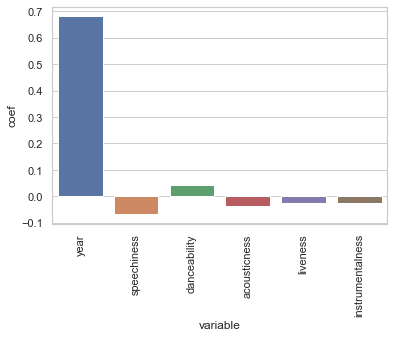

In [69]:
view_coeff(X4, linreg4)

In [70]:
#Mean R2 and RMSE results for each model
r2_rmse_cv_10 = pd.DataFrame()
lr_df_10 = pd.DataFrame({'Linear Reg': metrics_df2.mean().round(4)})
r2_rmse_cv_10['Linear Reg']=lr_df_10['Linear Reg']
r2_rmse_cv_10

,Linear Reg
Training R2,0.7846
Test R2,0.7846
Training RMSE,0.0998
Test RMSE,0.0998


In [71]:
results_lr = cross_val_score(linreg4, X_train, y_train, cv= kfold)
print('Linear Regression, Cross-Validation mean: %.4f' % results_lr.mean())

Linear Regression, Cross-Validation mean: 0.7844


In [72]:
#CV results in each fold
cv_results_10 = pd.DataFrame()
lr_cv_10 = pd.DataFrame({'Linear Reg': results_lr.round(4)})
cv_results_10['Linear Reg'] = lr_cv_10['Linear Reg']
cv_results_10

,Linear Reg
0,0.7865
1,0.7829
2,0.7899
3,0.7827
4,0.7794
5,0.7857
6,0.7822
7,0.7853
8,0.7849
9,0.7849


In [73]:
results_lr_5 = cross_val_score(linreg4, X_train, y_train, cv= 5)
print('Linear Regression, Cross-Validation mean: %.4f' % results_lr_5.mean())

Linear Regression, Cross-Validation mean: 0.7567


In [74]:
id = X_test.index[500]

In [75]:
data.loc[id,:]

acousticness                      0.0394
artists             Ángeles Del Infierno
danceability                       0.777
energy                             0.872
explicit                               0
instrumentalness                2.21e-05
key                                    2
liveness                            0.29
loudness                          -5.453
mode                                   0
name                                 666
popularity                            44
speechiness                        0.103
tempo                            133.475
valence                            0.645
year                                1989
duration_min                        3.72
Name: 1JR2xoOY6AwFd8aO6NIGrN, dtype: object

In [76]:
def predict(model, df, index_row):
    row = X_test.index[index_row]
    column = 'popularity'
    predictions = model.predict(X_test)
    
    r = df.loc[row,:]
    for i, c in enumerate (df.columns[:-1]):
        print('%-27s: %.4f' % (c, r[i]))
    print ('Popularity: %.4f'%df.loc[row,column])
    print ('Prediction: %.4f' %predictions[index_row])

In [77]:
predict(linreg4,df,500)

acousticness               : 0.0396
danceability               : 0.7864
explicit                   : 0.0000
instrumentalness           : 0.0000
key                        : 0.1818
liveness                   : 0.2900
mode                       : 0.0000
speechiness                : 0.1063
tempo                      : 0.5468
year                       : 0.6869
duration_min               : 0.0403
Popularity: 0.4400
Prediction: 0.4241


## KNN

Refer to file for details on how the best nearest neighbor derived from:<br>
1.1_KNN - v4 (Norm).ipynb

In [78]:
from sklearn.metrics import mean_squared_error
from IPython.display import display, Math

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor

from numpy import mean

In [81]:
#Define ML model(s)
kfold = KFold(n_splits = 10, random_state = 2,shuffle=True)

### Fit Model

In [90]:
#split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X4,y4,test_size=0.1, random_state = 2)
model_knn = KNeighborsRegressor(n_neighbors=61)
model_knn.fit(X_train1, y_train1)
# Mean score of cv=10
results_knn = cross_val_score(model_knn, X_train1, y_train1, cv= kfold)
print('KNN Regression, Cross-Validation mean: %.4f' % results_knn.mean())

KNN Regression, Cross-Validation mean: 0.8114


In [86]:
knn_metric = cal_mean_r2_and_RMSE (model_knn,10,X4,y4)

In [87]:
#Mean R2 and RMSE results for each model
knn_df_10 = pd.DataFrame({'KNN Reg': knn_metric.mean().round(4)})
r2_rmse_cv_10['KNN Reg'] = knn_df_10['KNN Reg'].values


In [88]:
r2_rmse_cv_10

,Linear Reg,KNN Reg
Training R2,0.7846,0.8185
Test R2,0.7846,0.8124
Training RMSE,0.0998,0.0916
Test RMSE,0.0998,0.0931


### CV table

In [91]:
#CV results in each fold
knn_cv_10 = pd.DataFrame({'KNN Reg': results_knn.round(4)})
cv_results_10['KNN Reg'] = knn_cv_10['KNN Reg']
cv_results_10

,Linear Reg,KNN Reg
0,0.7865,0.8135
1,0.7829,0.8041
2,0.7899,0.8153
3,0.7827,0.8131
4,0.7794,0.8056
5,0.7857,0.8123
6,0.7822,0.8116
7,0.7853,0.8096
8,0.7849,0.8162
9,0.7849,0.8132


In [92]:
knn_cv_10

,KNN Reg
0,0.8135
1,0.8041
2,0.8153
3,0.8131
4,0.8056
5,0.8123
6,0.8116
7,0.8096
8,0.8162
9,0.8132


## Decision Tree

Refer to file for details on how the best max_leaf_nodes derived from: <br>
1.2_DT - v4 (Norm).ipynb

### Fit Model

In [93]:
#split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X4,y4,test_size=0.1, random_state = 2)
#Calculate score and RMSE, CV = 10
model_dt = DecisionTreeRegressor(max_leaf_nodes=24, random_state = 2)
model_dt.fit(X_train1, y_train1)
dt_metric = cal_mean_r2_and_RMSE (model_dt,10,X4,y4)

# Mean score of cv=10
results_dt = cross_val_score(model_dt, X_train, y_train, cv= kfold)
print('Decision Tree Regression, Cross-Validation mean: %.4f' % results_dt.mean())


Decision Tree Regression, Cross-Validation mean: 0.8187


In [94]:
dt_metric = cal_mean_r2_and_RMSE (model_dt,10,X4,y4)

In [95]:
#Mean R2 and RMSE results for each model
dt_df_10 = pd.DataFrame({'DT Reg': dt_metric.mean().round(4)})
r2_rmse_cv_10['DT Reg'] = dt_df_10['DT Reg'].values
r2_rmse_cv_10

,Linear Reg,KNN Reg,DT Reg
Training R2,0.7846,0.8185,0.8190
Test R2,0.7846,0.8124,0.8187
Training RMSE,0.0998,0.0916,0.0915
Test RMSE,0.0998,0.0931,0.0915


### CV Score

In [97]:
#CV results in each fold
dt_cv_10 = pd.DataFrame({'DT Reg': results_dt.round(4)})
cv_results_10['DT Reg'] = dt_cv_10['DT Reg']
cv_results_10

,Linear Reg,KNN Reg,DT Reg
0,0.7865,0.8135,0.8183
1,0.7829,0.8041,0.8235
2,0.7899,0.8153,0.8173
3,0.7827,0.8131,0.8207
4,0.7794,0.8056,0.8233
5,0.7857,0.8123,0.8119
6,0.7822,0.8116,0.8144
7,0.7853,0.8096,0.8155
8,0.7849,0.8162,0.8202
9,0.7849,0.8132,0.8214


In [98]:
dt_cv_10

,DT Reg
0,0.8183
1,0.8235
2,0.8173
3,0.8207
4,0.8233
5,0.8119
6,0.8144
7,0.8155
8,0.8202
9,0.8214


## Random Forest

Refer to file for details on how the best max_leaf_nodes derived from: <br>
1.3_RF- v4 (Norm).ipynb

In [100]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Scoring for gridsearch for regression:
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

### Perform Grid-Search
gsc = GridSearchCV(
estimator=RandomForestRegressor(),
param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10, 50, 100,500,1000),},cv=5, scoring='neg_root_mean_squared_error', verbose=0,n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

{'max_depth': 6, 'n_estimators': 100}

### Fit Model

In [106]:
#split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X4,y4,test_size=0.1, random_state = 2)
model_rf = RandomForestRegressor(max_depth = 6, random_state = 2, n_estimators = 100)
model_rf.fit(X_train1,y_train1)
# Mean score of cv=10
results_rf = cross_val_score(model_rf, X_train1, y_train1, cv= kfold)
print('Random Forest Regression, Cross-Validation mean: %.4f' % results_rf.mean())


Random Forest Regression, Cross-Validation mean: 0.8211


In [107]:
rf_metric = cal_mean_r2_and_RMSE (model_rf,10,X4,y4)

In [108]:
#Mean R2 and RMSE results for each model
rf_df_10 = pd.DataFrame({'RF Reg': rf_metric.mean().round(4)})
r2_rmse_cv_10['RF Reg'] = rf_df_10['RF Reg'].values
r2_rmse_cv_10

,Linear Reg,KNN Reg,DT Reg,RF Reg
Training R2,0.7846,0.8185,0.8190,0.8223
Test R2,0.7846,0.8124,0.8187,0.8213
Training RMSE,0.0998,0.0916,0.0915,0.0906
Test RMSE,0.0998,0.0931,0.0915,0.0909


### CV Score

In [114]:
#CV results in each fold
rf_cv_10 = pd.DataFrame({'RF Reg': results_rf.round(4)})
cv_results_10['RF Reg'] = rf_cv_10['RF Reg']
cv_results_10

,Linear Reg,KNN Reg,DT Reg,RF Reg
0,0.7865,0.8135,0.8183,0.8222
1,0.7829,0.8041,0.8235,0.8135
2,0.7899,0.8153,0.8173,0.8241
3,0.7827,0.8131,0.8207,0.8218
4,0.7794,0.8056,0.8233,0.8156
5,0.7857,0.8123,0.8119,0.8237
6,0.7822,0.8116,0.8144,0.8208
7,0.7853,0.8096,0.8155,0.8194
8,0.7849,0.8162,0.8202,0.8261
9,0.7849,0.8132,0.8214,0.8237


In [115]:
rf_cv_10

,RF Reg
0,0.8222
1,0.8135
2,0.8241
3,0.8218
4,0.8156
5,0.8237
6,0.8208
7,0.8194
8,0.8261
9,0.8237


## Stacking

### Fit Model

In [112]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('knn', KNeighborsRegressor(n_neighbors=61)),
    ('rf', RandomForestRegressor(max_depth = 6, random_state = 2, n_estimators = 100))]

model_stk = StackingRegressor(estimators=estimators, final_estimator=linreg4, cv=10)
model_stk.fit(X_train1, y_train1)
results_stk = cross_val_score(model_stk, X_train1, y_train1, cv= kfold)
print('Stacking, Cross-Validation mean: %.4f' % results_stk.mean())

Stacking, Cross-Validation mean: 0.8221


In [117]:
stk_metric = cal_mean_r2_and_RMSE (model_stk,10,X4,y4)

In [119]:
#Mean R2 and RMSE results for each model
stk_df_10 = pd.DataFrame({'Stack Reg': stk_metric.mean().round(4)})
r2_rmse_cv_10['Stack Reg'] = stk_df_10['Stack Reg'].values
r2_rmse_cv_10

,Linear Reg,KNN Reg,DT Reg,RF Reg,Stack Reg
Training R2,0.7846,0.8185,0.8190,0.8223,0.8244
Test R2,0.7846,0.8124,0.8187,0.8213,0.8222
Training RMSE,0.0998,0.0916,0.0915,0.0906,0.0901
Test RMSE,0.0998,0.0931,0.0915,0.0909,0.0906


### CV Score

In [120]:
#CV results in each fold
stk_cv_10 = pd.DataFrame({'Stacking Reg': results_stk.round(4)})
cv_results_10['Stacking Reg'] = stk_cv_10['Stacking Reg']
cv_results_10

,Linear Reg,KNN Reg,DT Reg,RF Reg,Stacking Reg
0,0.7865,0.8135,0.8183,0.8222,0.8236
1,0.7829,0.8041,0.8235,0.8135,0.8145
2,0.7899,0.8153,0.8173,0.8241,0.8253
3,0.7827,0.8131,0.8207,0.8218,0.8231
4,0.7794,0.8056,0.8233,0.8156,0.8167
5,0.7857,0.8123,0.8119,0.8237,0.8244
6,0.7822,0.8116,0.8144,0.8208,0.8220
7,0.7853,0.8096,0.8155,0.8194,0.8204
8,0.7849,0.8162,0.8202,0.8261,0.8270
9,0.7849,0.8132,0.8214,0.8237,0.8246


## Predictions with all models

In [126]:
df = pd.DataFrame(X_test[500:505])
y_pred_lr = linreg4.predict(df)
y_pred_knn = model_knn.predict(df)
y_pred_rf = model_rf.predict(df)
y_pred_stk = model_stk.predict(df)
df['popularity']= y_test[500:505]
df['LR prediction']= y_pred_lr.round(2)
df['KNN prediction']= y_pred_knn.round(2)
df['Random Forest prediction']= y_pred_rf.round(2)
df['Stacking prediction']= y_pred_stk.round(2)
df


,year,acousticness,speechiness,danceability,instrumentalness,liveness,popularity,LR prediction,KNN prediction,Random Forest prediction,Stacking prediction
id,,,,,,,,,,,
0EpRxgIqC79gXUMI8jPMVc,0.69697,0.397590,0.045098,0.468623,0.000013,0.0712,0.44,0.41,0.42,0.39,0.40
5gAdATsfINRIljv4LbrKX2,0.69697,0.094779,0.025593,0.498988,0.004670,0.1000,0.35,0.43,0.42,0.41,0.41
2stpRsuHfZ8YcdNaPZVI8u,0.69697,0.529116,0.031166,0.706478,0.000069,0.1420,0.32,0.42,0.41,0.41,0.40
2870IxJOum4NudWQvWXXwU,0.69697,0.012651,0.039009,0.559717,0.000139,0.0876,0.31,0.43,0.40,0.39,0.39
53rV8ViOYJ02LtjgEiheIe,0.69697,0.027209,0.271414,0.809717,0.000000,0.0610,0.35,0.43,0.40,0.40,0.40


# Conclusion:

Implemented ensembling method, stacking. Accuracy Score of 82% and Test RMSE observed to have improvements.
Better scores can be attributed by Stacking as it learns how to combine the predictions of each base algorithm in the best way. The meta-model Linear Regression, is trained on the predictions made by base models on out-of-sample data.


Cons: It takes very long to run and might not be cost effective to go into production
Meta-model learns to use both the predictions of the base models and the original data to predict the final output.
